# Library importation

https://www.musicindustryhowto.com/elements-of-music/

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.preprocessing import PolynomialFeatures

# Data Exploration

In [4]:
df = pd.read_csv("spotify_data.csv")

In [4]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [4]:
df.shape

(169909, 19)

In [5]:
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


In [6]:
df.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

# Data Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

There is no missing values on the dataframe

### Change of the data types

In [5]:
df["artists"] = df["artists"].str.replace("[", "", regex=True).str.replace("]", "", regex=True).astype("string")

In [6]:
df["explicit"].unique()

array([0, 1])

In [7]:
# explicit is a boolean value. So instead of having an int, it's better to have a boolean
df["explicit"] = df["explicit"].replace({0 : False, 1 : True}).astype("bool")

In [8]:
df["acousticness"].max()

0.996

In [9]:
# acousticness maximum value is 0.996, so we can have it on 16 bits
df["acousticness"] = df["acousticness"].astype("float16")

In [10]:
df["danceability"].max()

0.988

In [11]:
# danceability maximum value is 0.988, so we can have it on 16 bits
df["danceability"] = df["danceability"].astype("float16")

In [12]:
df["energy"].max()

1.0

In [13]:
# energy maximum value is 1.0, so we can have it on 16 bits
df["energy"] = df["energy"].astype("float16")

In [14]:
# id is actually a string, so we can replace its type from object to string
df["id"] = df["id"].astype("string")

In [15]:
df["instrumentalness"].max()

1.0

In [16]:
# instrumentalness maximum value is 1.0, so we can have it on 16 bits and the bits of mantissa are not big
df["instrumentalness"] = df["instrumentalness"].astype("float16")

In [25]:
print(df["key"].max())
df["key"].min()

11


0

In [17]:
# maximum value of key is 11 and the minimum value is 0 so int8 is enough to represent the key
df["key"] = df["key"].astype("int8")

In [27]:
print(df["liveness"].max())
df["liveness"].min()

1.0


0.0

In [18]:
# same observation as of energy for liveness
df["liveness"] = df["liveness"].astype("float16")

In [30]:
print(df["loudness"].max())
df["loudness"].min()

3.855


-60.0

In [19]:
# in the API, it's said that loudness ranges between -60 and 0.0
# but in the dataset, the max value is 3.855
# float32 is ok for the data type
df["loudness"] = df["loudness"].astype("float32")

In [31]:
df["mode"].unique()

array([1, 0])

In [20]:
# mode represents the modality of a track. 0 for minor and 1 for major.
# we can set it to boolean with False for minor and True for major
df["mode"] = df["mode"].replace({0:False, 1:True}).astype("bool")

In [21]:
# change the data type of name from object to string
df["name"] = df["name"].astype("string")

In [35]:
print(df["popularity"].max())
df["popularity"].min()

100


0

In [22]:
# the popularity is between 0 and 100 so 8 bits are enough
df["popularity"] = df["popularity"].astype("int8")

In [23]:
# speechiness is between 0.0 and 1.0
df["speechiness"] = df["speechiness"].astype("float16")

In [41]:
print(df["tempo"].min())
df["tempo"].max()

0.0


244.091

It's better not to change the type of tempo because it doesn't have a fix interval and depend from the duration

In [24]:
# valence is between 0.0 and 1.0
df["valence"] = df["valence"].astype("float16")

In [25]:
# remove the release_date column because of the inconsistency of its data
# sometimes we have the whole date and other times, it's just the year
# it seems like just keeping the year column is relevant
new_df = df.drop(columns=["release_date"])

In [45]:
# now let's see the memory usage after that preprocessing
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float16
 1   artists           169909 non-null  string 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float16
 5   explicit          169909 non-null  bool   
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float16
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float16
 10  loudness          169909 non-null  float32
 11  mode              169909 non-null  bool   
 12  name              169909 non-null  string 
 13  popularity        169909 non-null  int8   
 14  speechiness       169909 non-null  float16
 15  tempo             169909 non-null  float64
 16  valence           16

We reduced the size from 25MB to 13.5MB

In [46]:
new_df.shape

(169909, 18)

# Data Visualization

## PCA

In [6]:
from sklearn.decomposition import PCA

In [17]:
new_df.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'speechiness', 'tempo', 'valence',
       'year'],
      dtype='object')

In [43]:
songs_id = new_df["id"]

In [7]:
# remove non-numerical data
pca_df = new_df.drop(columns=["name", "artists", "id"])

# apply the log on duration_ms
pca_df["duration_ms"] = pca_df["duration_ms"].apply(np.log)

# centered data 
pca_df = pca_df - pca_df.mean()

# perform PCA
pca = PCA()
pca_model = pca.fit_transform(pca_df)

In [9]:
column = [f"PCA {i+1}" for i in range(pca.n_components_)]

In [50]:
songs = new_df["name"].tolist()
songs_ids = new_df["id"].tolist()
# let's see the data in the pca space
pca_space_df = pd.DataFrame(pca_model, index=songs_ids, columns=column)
pca_space_df.head()

,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6,PCA 7,PCA 8,PCA 9,PCA 10,PCA 11,PCA 12,PCA 13,PCA 14,PCA 15
6KbQ3uYMLKb5jDxLF7wYDD,47.298664,-33.496750,-6.831117,-4.122078,4.771617,-0.353952,0.067012,-0.206238,0.147109,0.133307,-0.336644,-0.091504,-0.111758,-0.125123,-0.015456
6KuQTIu1KoTTkLXKrwlLPV,67.797473,-5.199099,-7.265930,10.962658,3.198372,-0.148380,-0.567682,0.067961,0.287768,0.303161,0.069147,-0.138951,0.023925,-0.000675,-0.156786
6L63VW0PibdM1HDSBoqnoM,54.201155,-24.290924,-7.045932,3.144215,-0.007315,0.566546,0.911230,0.650160,0.010269,-0.260741,-0.027219,-0.040328,-0.399838,0.476548,0.195272
6M94FkXd15sOAOQYRnWPN8,53.310769,-24.853850,-6.906720,-1.853086,-4.150871,0.785353,0.215439,-0.296587,0.337218,0.168755,-0.418507,-0.126417,-0.208801,-0.119765,-0.031314
6N6tiFZ9vLTSOIxkj8qKrd,78.380597,13.590698,-7.688573,-1.240064,5.860678,0.027254,-1.473737,-0.181493,0.150557,0.474371,-0.032419,-0.115688,0.049887,0.068309,0.024803


In [9]:
# let's take a look to the coordinates of components in the original space
df_origin_to_pca = pd.DataFrame(pca.components_.T, index=pca.feature_names_in_, columns=column)
df_origin_to_pca

,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6,PCA 7,PCA 8,PCA 9,PCA 10,PCA 11,PCA 12,PCA 13,PCA 14,PCA 15
acousticness,0.006729,-0.002751,-0.001865,0.020992,-0.000347,-0.051515,0.020202,-0.642147,-0.464695,-0.011783,-0.446498,0.210932,0.150879,0.258303,-0.186199
danceability,-0.000892,0.000842,-0.000921,-0.008140,0.000584,-0.001619,0.111658,0.210368,0.006321,-0.122003,-0.411878,-0.117902,-0.573246,-0.202040,-0.612622
duration_ms,-0.001831,0.001642,0.000377,-0.001086,-0.000581,0.248414,-0.924557,0.173826,-0.097002,-0.050664,-0.200164,0.021441,0.007494,0.021059,0.016119
energy,-0.004380,0.001053,0.001895,-0.031362,0.000083,0.023767,-0.004531,0.212406,0.332423,-0.026176,0.123339,0.202697,0.414392,0.508475,-0.596268
explicit,-0.001613,0.001327,0.001858,-0.002220,0.000326,0.052476,0.142155,0.413622,-0.300535,0.728057,-0.277961,-0.018560,0.298060,-0.136169,-0.023801
instrumentalness,0.002723,-0.001015,0.000988,0.019097,0.000090,0.061822,-0.108478,-0.407713,0.695067,0.500715,-0.242664,0.007780,-0.147089,-0.022186,0.053857
key,-0.001195,0.000592,0.001889,-0.027790,0.999498,-0.014093,-0.004687,-0.000776,-0.000482,0.001793,0.000451,-0.000227,-0.000200,-0.000457,-0.000046
liveness,0.000245,-0.000288,0.000979,-0.003503,-0.000161,0.002299,-0.005588,0.061759,-0.009942,0.052311,0.136025,0.928545,-0.169415,-0.289585,-0.006418
loudness,-0.084998,0.024469,0.028385,-0.994145,-0.027903,-0.000037,-0.004714,-0.036148,-0.011760,0.017130,-0.002531,-0.006612,-0.014012,-0.006599,0.014755
mode,0.000264,-0.000528,0.000057,0.000090,-0.014783,-0.962411,-0.245835,0.072935,0.022179,0.079671,-0.026972,-0.003521,-0.009167,0.007880,-0.008081


In [11]:
# part of the variance explained by each component
pca.explained_variance_ratio_

array([5.49536741e-01, 4.02418368e-01, 3.07289069e-02, 1.11056006e-02,
       5.85166750e-03, 9.82006493e-05, 8.20190567e-05, 4.74495263e-05,
       3.53963765e-05, 3.45890459e-05, 2.67406353e-05, 1.51156268e-05,
       8.23726862e-06, 6.35413506e-06, 4.61314108e-06])

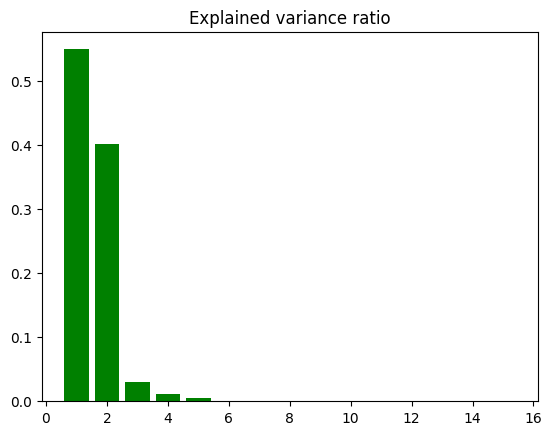

In [59]:
# explained variance ratio

# get the number of singular values which is equal to the number of components
nb_sing_values = len(pca.singular_values_)

# plot a bar chart of the explained variance
plt.title("Explained variance ratio")
plt.bar(x = range(1, nb_sing_values+1), height=pca.explained_variance_ratio_, color="g")
plt.show()

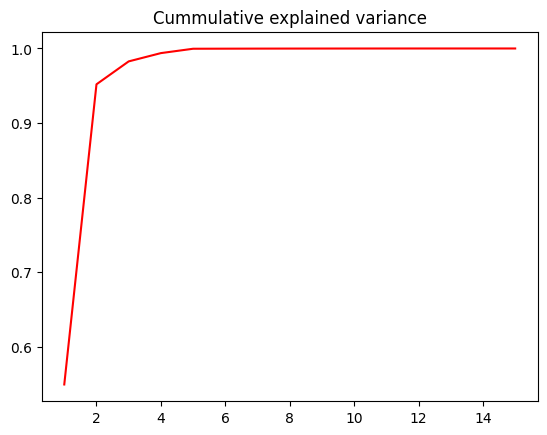

In [64]:
# let us take a look to the cumulative explained variance
plt.title("Cummulative explained variance")
plt.plot(range(1, nb_sing_values+1), np.cumsum(pca.explained_variance_ratio_), c="r")
plt.show()

From this plot, we can see that 2 components are enough to get good insights of our data

### 2D representation

#### Representation with the first 2 components

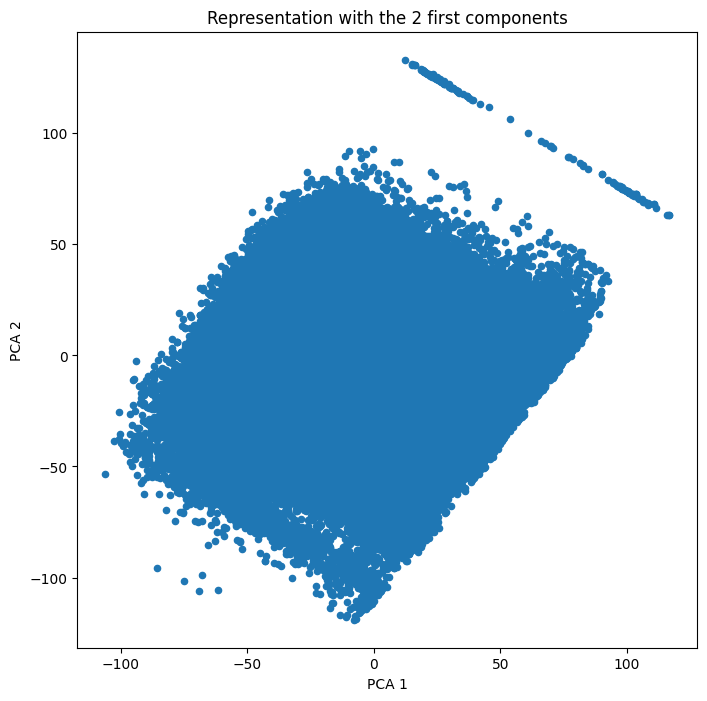

In [98]:
ax = pca_space_df.plot(kind='scatter',x='PCA 1', y='PCA 2',figsize=(8,8))
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_title("Representation with the 2 first components")
plt.show()

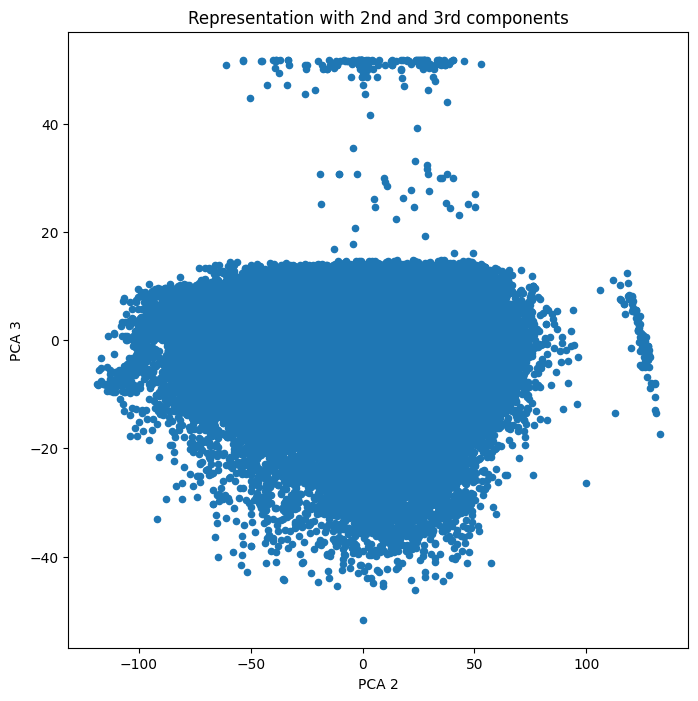

In [42]:
ax = pca_space_df.plot(kind='scatter',x='PCA 2', y='PCA 3',figsize=(8,8))
ax.set_xlabel("PCA 2")
ax.set_ylabel("PCA 3")
ax.set_title("Representation with 2nd and 3rd components")
plt.show()

## What do these clusters represent ?

#### Data from the representation with 2nd and 3rd components

In [52]:
temp = pca_space_df[pca_space_df["PCA 3"] >= 40].index.tolist()

In [53]:
new_df[new_df["id"].isin(temp)]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
8077,0.0106,['Tame Impala'],0.622,218200,0.784,1,3Naa5mKj5pbrNGyHsE04zo,0.008900,1,0.1040,-3.830,0,The Less I Know The Better,0,0.0292,116.892,0.780,2020
8084,0.0352,['Anitta'],0.967,205595,0.772,0,5JY9u3KjWIGL188kp59Ktn,0.000013,3,0.0792,-3.291,0,Blá blá blá - Extended Remix,1,0.0851,131.998,0.856,2020
8090,0.4600,['Morat'],0.591,230040,0.659,0,0BLnBgQf8xmFN2qsxF16hy,0.000000,11,0.3240,-5.464,1,Enamórate De Alguien Más,2,0.0332,145.997,0.622,2020
8092,0.0608,['Morat'],0.582,240240,0.921,0,3YV7XXT0lAlY4wACbw3HDZ,0.000000,4,0.1370,-3.928,1,Cómo Te Atreves,0,0.0457,131.004,0.686,2020
8093,0.1260,"['Morat', 'Juanes']",0.683,231440,0.970,0,4AUgtXs2HmOXrw0ROxQM8l,0.000000,2,0.1050,-3.589,1,Besos En Guerra,0,0.0489,143.931,0.769,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169848,0.2620,['Ellie Goulding'],0.453,148689,0.316,0,2qND8W95D4UIab4MszDGyS,0.000894,0,0.1350,-8.525,1,How Long Will I Love You,3,0.0316,125.628,0.177,2020
169849,0.2620,['Ellie Goulding'],0.453,148689,0.316,0,3AMQUcKmht3G7PhvTJYuZ4,0.000894,0,0.1350,-8.525,1,How Long Will I Love You,0,0.0316,125.628,0.177,2020
169850,0.9320,['Ellie Goulding'],0.491,188733,0.367,0,54OjRoNNwpExHizhCKhddk,0.000876,10,0.1110,-7.164,1,Your Song,0,0.0308,134.105,0.455,2020
169851,0.9730,['Ellie Goulding'],0.415,207373,0.262,0,6lMqDaZjoqe6J1p8TdHuBZ,0.000003,9,0.1060,-12.530,1,I Know You Care,4,0.0333,105.861,0.311,2020


We see there that all the data collected on the representation with 2nd and 3rd components are from year 2020.
From the dataframe, it seems like all those songs have a small popularity. Let's just check it

In [63]:
# max popularity of the songs
new_df[new_df["id"].isin(temp)]["popularity"].max()

13

### Data from the representation with the 2 first components

In [101]:
# we just take a bunch of the points discriminate from the others
ids = pca_space_df[(pca_space_df["PCA 1"] >= 100)].index.tolist()
len(ids)
id2 = pca_space_df[(pca_space_df["PCA 2"] >= 100)].index.tolist()
len(id2)

80

In [100]:
# get the data corresponding to the second cluster in pca space
new_df[new_df["id"].isin(id2)]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
6930,0.931000,['Crain & Taylor'],0.0,598425,0.000075,0,3oKBZhpwrMiOhosXauv3lP,0.892000,1,0.115,-19.703,0,Ocean Waves,47,0.0,0.0,0.0,2008
7411,0.111000,['Sound Dreamer'],0.0,5403500,0.000099,0,7foc25ig7dibxvULPU2kBG,0.392000,2,0.137,-21.669,1,Brown Noise - 90 Minutes,50,0.0,0.0,0.0,2013
7792,0.145000,['Fan Sounds'],0.0,500167,0.000020,0,4xu38KnbRHbRHRwdg4KFul,0.213000,6,0.114,-25.556,1,Box Fan Long Loop For Sleep,60,0.0,0.0,0.0,2017
15605,0.962000,['Hippie Sabotage'],0.0,157041,0.236000,1,4aVbFYIU67P8F5pqPakaXQ,0.000335,7,0.105,-13.909,0,Waiting Too Long,54,0.0,0.0,0.0,2014
15787,0.956000,['White Noise Spa'],0.0,300300,0.000020,0,5wf3wwLBJj4j46xtJETZ8L,0.238000,10,0.131,-20.961,0,Soothing Deep Pink Noise,58,0.0,0.0,0.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161305,0.960000,['Fizzonaut'],0.0,132923,0.000261,0,6UrBiRJabWOu90XTluKZER,0.203000,1,0.111,-23.444,1,Tepid Rainscape,68,0.0,0.0,0.0,2019
161443,0.916000,['Water Sound Natural White Noise'],0.0,63000,0.032000,0,5pGBDKBaR63vuJ4g8ialcU,0.202000,1,0.103,-30.704,1,Deep Sleep Recovery Noise,70,0.0,0.0,0.0,2020
169522,0.913000,['Granular'],0.0,205161,0.000164,0,2e6fCxto7NzsnujvliBtEk,0.910000,10,0.155,-31.221,0,White Noise - 700 hz,64,0.0,0.0,0.0,2017
169743,0.000013,['Naturaleza FX'],0.0,150879,0.000020,0,4UFlnhDTGyKvlhOQziDHkG,0.208000,1,0.311,-16.873,1,Colors of the Rain,68,0.0,0.0,0.0,2019


In [103]:
new_df[new_df["id"].isin(id2)]["year"].min()

1991

In [83]:
len(new_df[(new_df["danceability"] == 0) & (new_df["tempo"] == 0) &  (new_df["valence"] == 0) & (new_df["speechiness"] == 0)]["id"].value_counts())

147

From the dataframe, we see that all those data have a danceability, a tempo, a valence and a speechiness equal to 0

### 3D Representation

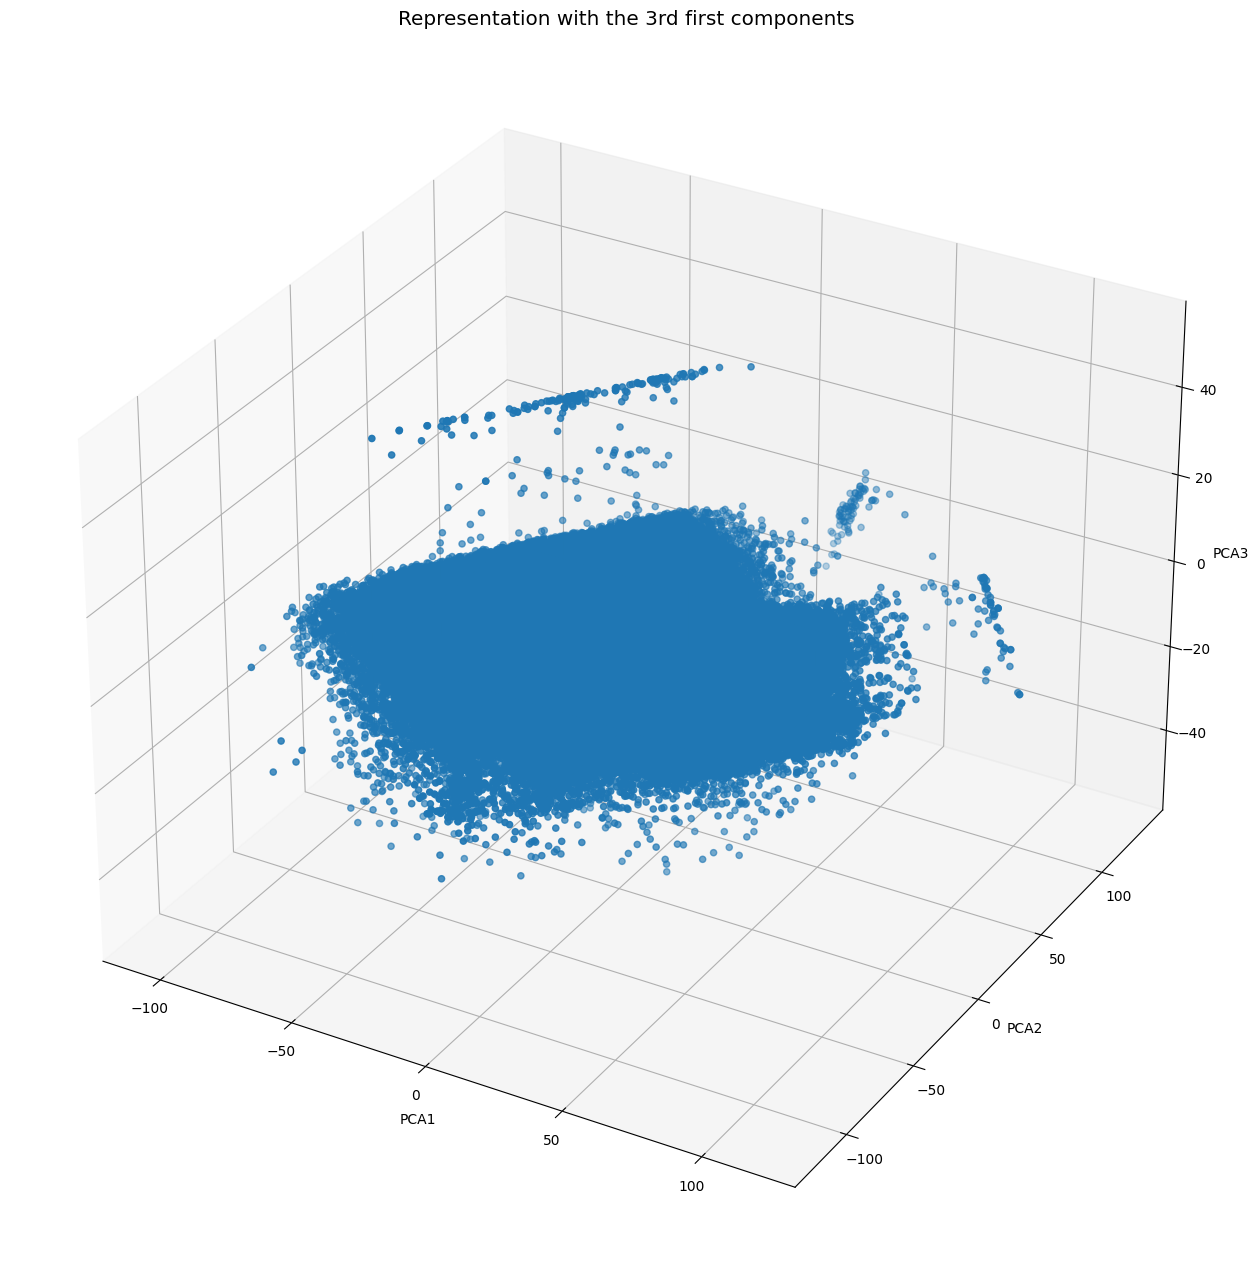

In [93]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection="3d")
ax.set_title("Representation with the 3rd first components")
ax.scatter(pca_model[:, 0], pca_model[:, 1], pca_model[:, 2])
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
plt.show()

The 3D representation give us the same information as representation with the 2nd and 3rd first components; which is the less popular songs of 2020

### Other hypothesis

From df_origin_to_pca, we see that PCA 1 and PCA 2's coordinates are mostly expressed from tempo and year while PCA 3's coordinates are mostly expressed from year and popularity. 

Let us plot them and see if we got any insight

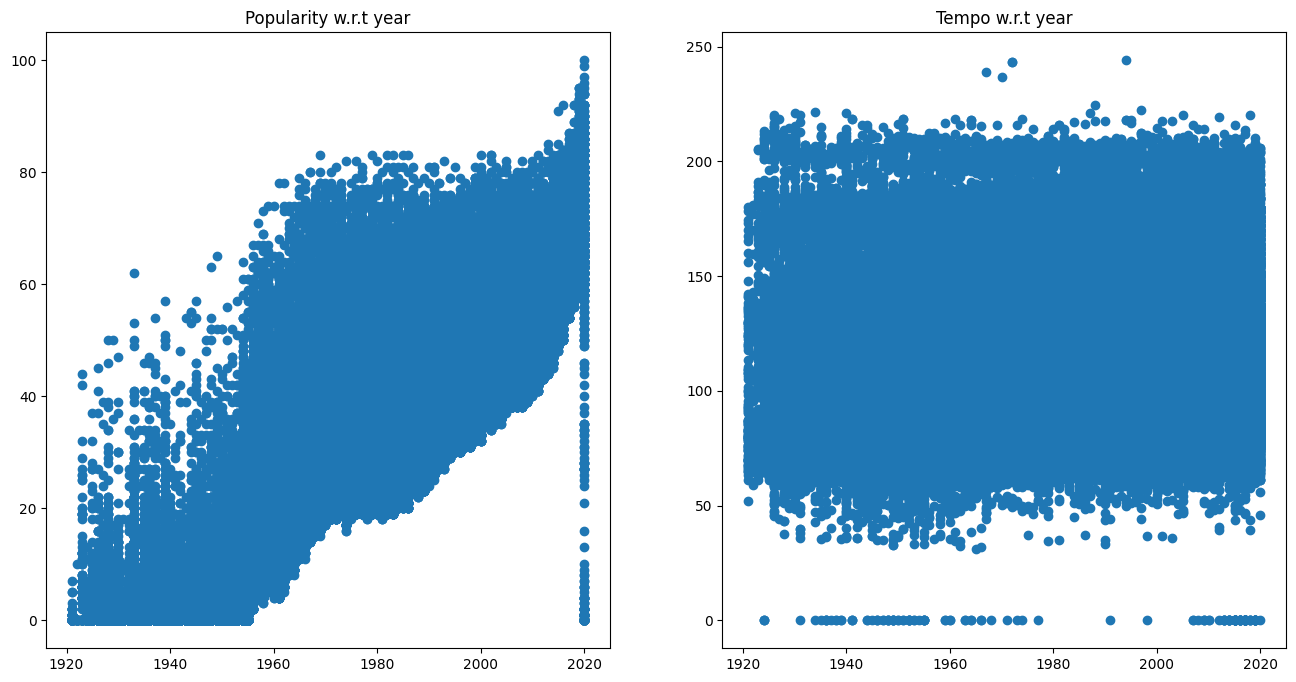

In [111]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121)
ax.scatter(x=new_df["year"], y=new_df["popularity"])
ax.set_title("Popularity w.r.t year")

ax2 = fig.add_subplot(122)
ax2.scatter(x=new_df["year"], y=new_df["tempo"])
ax2.set_title("Tempo w.r.t year")
plt.show()

So,it seems like year is strongly correlated to popularity and also that PCA 1&2 were probably representing songs with null tempo over the years

# Data Splitting

In order to train and test our models, we decided to split our dataset into train and testing data. Testing data will represent 30% of our dataset

In [26]:
# ***************** splitting ******************
index1 = new_df.index

# get the training data : 70% of the dataset
df_train = new_df.sample(frac=0.7)
index2 = df_train.index

# get the testing data
mask = np.isin(index1, index2, invert=True)
df_test = new_df.iloc[mask]

# reset indexes 
df_train.reset_index(drop=True)
df_test.reset_index(drop=True)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
0,0.995117,'Carl Woitschach',0.708008,158648,0.194946,False,6KbQ3uYMLKb5jDxLF7wYDD,0.562988,10,0.151001,-12.428000,True,Singende Bataillone 1. Teil,0,0.050598,118.469,0.778809,1928
1,0.994141,"'Robert Schumann', 'Vladimir Horowitz'",0.378906,282133,0.013496,False,6KuQTIu1KoTTkLXKrwlLPV,0.900879,8,0.076294,-28.454000,True,"Fantasiestücke, Op. 111: Più tosto lento",0,0.046204,83.972,0.076721,1928
2,0.995117,'Francisco Canaro',0.780762,180760,0.130005,False,6M94FkXd15sOAOQYRnWPN8,0.887207,1,0.111023,-14.734000,False,Bebamos Juntos - Instrumental (Remasterizado),0,0.092590,108.003,0.720215,1928
3,0.987793,'Carl Woitschach',0.555176,153967,0.420898,False,6OJjveoYwJdIt76y0Pxpxw,0.835938,1,0.104980,-9.878000,True,Per aspera ad astra,0,0.047394,123.310,0.856934,1928
4,0.994141,"'Sergei Rachmaninoff', 'Vladimir Horowitz'",0.375977,590293,0.071899,False,6QBInZBkQNIQYU9gGzT5l4,0.882812,10,0.196045,-21.849001,False,"Piano Sonata No. 2 in B-Flat Minor, Op. 36: I....",0,0.035187,141.390,0.039307,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50968,0.591797,'Noah Cyrus',0.618164,190183,0.427979,False,0gySkOOewOdZtHG8stPEB8,0.000000,7,0.192017,-8.500000,False,Young & Sad,71,0.037994,142.021,0.358887,2020
50969,0.495117,"'Goyard Oz', '$IMEON'",0.863770,63784,0.439941,True,6T78uCv6W58xPrNpS6yZZt,0.000000,5,0.320068,-11.642000,False,Vibes Only,64,0.553223,137.086,0.848145,2020
50970,0.027405,"'Lil Tjay', 'Sheff G', 'Sleepy Hallow'",0.701172,191904,0.645020,True,0w1x05XBSRIuVmKd3D0IPd,0.000174,8,0.326904,-3.084000,False,Wet Em Up Pt. 2,67,0.163940,107.955,0.576172,2020
50971,0.045197,'Kelly Clarkson',0.654785,216107,0.719238,False,0o58NWBiVXewJNfNDKQyjw,0.000018,2,0.109009,-7.400000,True,I Dare You,69,0.036804,124.034,0.435059,2020


# Correlation between columns

After the findings of PCA, let us compute the pairwise Pearson correlation coefficient

In [9]:
# compute the pairwise correlation coefficient between all the columns but name, artists, year, id, key
new_df2 = new_df.drop(columns=["name", "artists", "id", "key"])
new_df2.corr(numeric_only=False)

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
acousticness,1.000000,-0.265950,-0.079311,-0.750283,-0.253690,0.335821,-0.023871,-0.567072,0.046475,-0.593345,-0.056077,-0.204982,-0.185540,-0.624550
danceability,-0.265950,1.000000,-0.134500,0.220569,0.241891,-0.281429,-0.105532,0.294170,-0.045306,0.221077,0.225305,-0.004872,0.560242,0.203430
duration_ms,-0.079311,-0.134500,1.000000,0.036396,-0.043811,0.084814,0.034270,-0.014687,-0.046981,0.063292,-0.058449,-0.028816,-0.198760,0.076293
energy,-0.750283,0.220569,0.036396,1.000000,0.142677,-0.287692,0.126293,0.782982,-0.038355,0.497488,-0.045226,0.249936,0.350086,0.532419
explicit,-0.253690,0.241891,-0.043811,0.142677,1.000000,-0.138292,0.039272,0.152695,-0.083221,0.214044,0.413074,0.011484,-0.022327,0.245227
instrumentalness,0.335821,-0.281429,0.084814,-0.287692,-0.138292,1.000000,-0.047397,-0.417033,-0.035051,-0.299829,-0.115735,-0.107570,-0.193929,-0.291571
liveness,-0.023871,-0.105532,0.034270,0.126293,0.039272,-0.047397,1.000000,0.052985,0.005393,-0.075293,0.147667,0.008124,-0.000426,-0.055839
loudness,-0.567072,0.294170,-0.014687,0.782982,0.152695,-0.417033,0.052985,1.000000,-0.013147,0.466546,-0.105796,0.211114,0.308418,0.490118
mode,0.046475,-0.045306,-0.046981,-0.038355,-0.083221,-0.035051,0.005393,-0.013147,1.000000,-0.032854,-0.057493,0.014539,0.014727,-0.033084
popularity,-0.593345,0.221077,0.063292,0.497488,0.214044,-0.299829,-0.075293,0.466546,-0.032854,1.000000,-0.135707,0.135047,0.009327,0.880724


From this pairwise correlation, the data below have a "strong" correlation(there, we consider as 
strong correlation a correlation for which Pearson coefficient r is >= 0.5) : 
- acousticness and energy are strongly correlated with r = -0.75
- acousticness is moderately correlated to loudness with r = -0.56
- acousticness and popularity are moderately correlated with r = -0.59
- danceability is moderately correlated to valence with r = 0.56
- energy is strongly correlated to loudness with r = 0.78
- popularity is mostly correlated to acousticness and year
- year is mostly correlated to acousticness, energy and popularity

From those observations, some questions pop up :
- will PCA be enough to visualize the underlying structure of those data ? In fact, 8/13 columns are pairwise correlated. And we know that PCA is based on the linear dependence of features. So, is there any linear dependence between all those data ?
- can we use acoustic to predict energy, loudness and/or popularity ?
- can we use danceability to predict valence ?
- can we use energy to predict loudness ?
- can we perform a multiple regression between energy, loudness and acousticness

See you on the next episode(which is the remainder of this project 😉) !!!

# What makes you popular ?

We are interested on criteria that made a song popular.
On this purpose, we are going to build a linear regressor on the popularity. 
The process will be :
- based on the correlation coefficient, we will select variables for which the correlation coefficient is greater that 0.40
- made successive student's tests to know if we could discard some variables

## Linear regressor

The features we'll use to build the regressor on popularity are : acousticness and year

### Regressor of popularity by year

We saw that popularity is mostly correlated to year.
So let's start with a simple linear regressor of popularity by year

#### Model

In [57]:
popularity = np.array(df_train["popularity"]).reshape(-1,1)
year = np.array(df_train["year"]).reshape(-1,1)
features = np.hstack((np.ones(len(year), dtype=int).reshape(-1,1), year))
pop_model = LinearRegression().fit(features, popularity)

#### Visualization on the training data

The coefficient of determination is 0.7747504359967


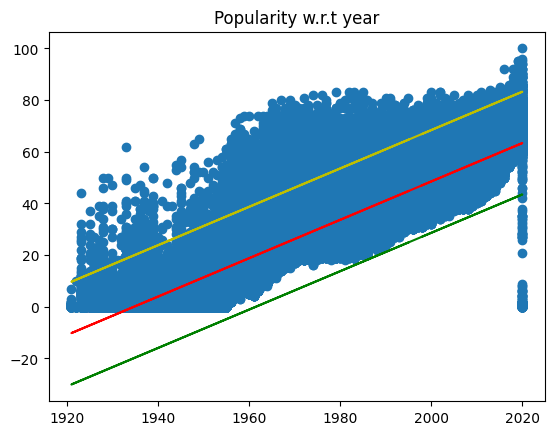

In [59]:
prediction = pop_model.predict(features)
print(f"The coefficient of determination is {pop_model.score(features, popularity)}")

# in the remainder, we will build a 95% confidence interval of the values of popularity

# 1. get the residuals
res = np.sum((prediction - popularity)**2)

# 2. get the standard deviation
std = np.sqrt(res/len(prediction)-2)

# 3. compute the interval
interval = std * 1.96

# 4. compute the lower and upperbounds of the interval
low, up = prediction - interval, prediction + interval

# plot the data
plt.scatter(year, popularity)
plt.plot(year, low, c="g")
plt.plot(year, prediction, c="r")
plt.plot(year, up, c="y")
plt.title("Popularity w.r.t year")
plt.show()

In [60]:
pop_model.coef_

array([[0.        , 0.74295061]])

From the model above, we deduce that 77,47% of the popularity is explained by the year

#### Prediction on test data

In [63]:
pop_test = np.array(df_test["popularity"]).reshape(-1, 1)
year_test = np.array(df_test["year"]).reshape(-1, 1)
feats = np.hstack((np.ones(len(year_test), dtype=int).reshape(-1, 1), year_test))
prediction_test = pop_model.predict(feats)
print(f"Score on test data : {pop_model.score(feats, pop_test)}")
print(f"Residual on test data : {np.sum((prediction_test - year_test)**2)}")

Score on test data : 0.7777996462666512
Residual on test data : 192953259062.6758


#### Multiple linear regressor model

When we look at our data, the curve described is like the square root plot. \
Let us build a multiple linear regressor model

##### Model

In [68]:
year = np.array(df_train["year"]).reshape(-1,1)
features = np.hstack((np.array(year), np.sqrt(np.array(year))))
popularity = np.array(df_train["popularity"]).reshape(-1, 1)
model = LinearRegression().fit(features, popularity)

##### Visualization on training data

Coefficient of determination : 0.7748765698430629
Residuals = 12472960.59859957


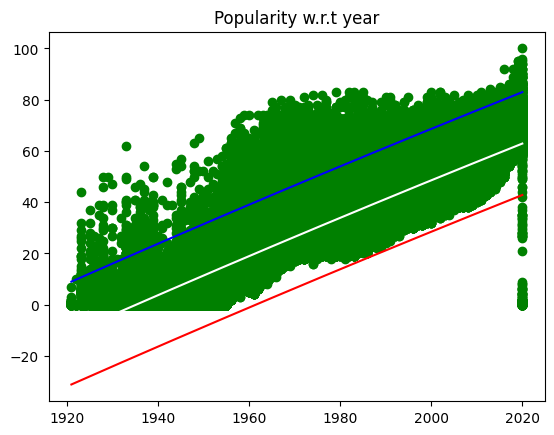

In [69]:
prediction = model.predict(features)
print(f"Coefficient of determination : {model.score(features, popularity)}")

# build a 95% confidence interval

# 1. residuals
res = np.sum((prediction - popularity)**2)
print(f"Residuals = {res}")

# To get a nice plot
stack = np.hstack((year, popularity, prediction))
sorted_s = stack[np.argsort(stack[:, 0])]
year, popularity, prediction = np.hsplit(sorted_s, 3)

# 2. standard deviation
std = np.sqrt(res/(len(prediction)-2))

# 3. interval
interval = std * 1.96

# 4. lower and upperbounds
low, up = prediction - interval, prediction + interval

# Plotting
plt.scatter(year, popularity, c="g")
plt.plot(year, low, c="r")
plt.plot(year, prediction, c="white")
plt.plot(year, up, c="b")
plt.title("Popularity w.r.t year")
plt.show()

In [70]:
model.coef_

array([[ -2.24415823, 265.52598232]])

With this model, we observe a huge reduction of the residuals

### Linear regressor of popularity by year and acousticness

Popularity is moderately correlated to acousticness. \
The question is : if we use year and acousticness, can we get a better prediction of the popularity ? \
Is year only enough to predict the popularity ?

##### Model

In [72]:
year = np.array(df_train["year"]).reshape(-1, 1)
acous = np.array(df_train["acousticness"]).reshape(-1, 1)
pop = np.array(df_train["popularity"]).reshape(-1, 1)
features = np.hstack((year, acous))
mul_model = LinearRegression().fit(features, pop)

##### Visualization on training data

In [73]:
from mpl_toolkits.mplot3d import Axes3D

Coefficient of determination : 0.7777663566110262
Residuals = 12312852.001862066


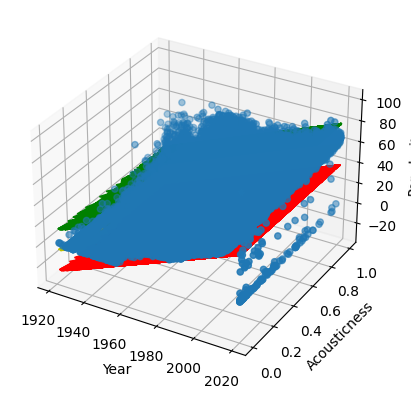

In [78]:
prediction = mul_model.predict(features)
print(f"Coefficient of determination : {mul_model.score(features, pop)}")

# build a 95% confidence interval

# 1. residuals 
res = np.sum((prediction - pop)**2)
print(f"Residuals = {res}")

# 2. standard deviation
std = np.sqrt(res/(len(prediction)-1))

# 3. interval
interval = std * 1.96

# 4. lower and upperbounds
low, up = prediction-interval, prediction+interval

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(year, acous, pop)
ax.set_xlabel("Year")
ax.set_ylabel("Acousticness")
ax.set_zlabel("Popularity")
ax.plot(year, acous, up, c="g")
ax.plot(year, acous, prediction, c="y")
ax.plot(year, acous, low, c="r")
plt.show()

By adding acousticness, we don't have that much difference either on residuals or coefficient of determination.

In [100]:
pivot = pd.pivot_table(
    data = df,
    values = ["popularity"],
    index = ["year"],
    aggfunc= {"popularity" : np.max}
)

In [101]:
pivot

,popularity
year,
1921,7
1922,10
1923,44
1924,13
1925,37
...,...
2016,92
2017,87
2018,92


In [102]:
new_df = pd.merge(left=df, right=pivot, on=["year","popularity"], how="inner")

In [103]:
new_df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.73200,['Dennis Day'],0.819,180533,0.3410,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,7,1921,0.4150,60.936,0.963,1921
1,0.67400,['Uli'],0.645,126903,0.4450,0,35iwgR4jXetI318WEWsa1Q,0.744000,0,0.1510,-13.338,1,Carve,10,1922-02-22,0.4510,104.851,0.127,1922
2,0.99600,['Bessie Smith'],0.614,177133,0.0423,0,2wAfHM7Whz67VFbdanhZlk,0.002930,4,0.1830,-12.033,1,Nobody Knows You When You're Down and Out,44,1923,0.0535,89.822,0.211,1923
3,0.81600,"['Paul Whiteman & His Orchestra', 'Bix Beiderb...",0.678,206000,0.3950,0,59UEylF5pnWCXm91Hzk2Q9,0.240000,3,0.1000,-9.825,1,Mississippi Mud (feat. Bix Beiderbecke),13,1924,0.1330,184.446,0.832,1924
4,0.96900,['Tommy Dorsey'],0.678,194320,0.1750,0,3XDharvL8vEyxdQwOQKmww,0.001050,3,0.1770,-13.021,1,"On the Sunny Side of the Street (From ""Is Ever...",37,1925,0.0301,112.941,0.580,1925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,0.00513,['Travis Scott'],0.834,312820,0.7300,1,2xLMifQCjDGFmkHkpNLD9h,0.000000,8,0.1240,-3.714,1,SICKO MODE,92,2018-08-03,0.2220,155.008,0.446,2018
112,0.10400,['Roddy Ricch'],0.896,196653,0.5860,1,0nbXyq5TXYPCO7pr3N8S4I,0.000000,10,0.7900,-6.687,0,The Box,95,2019-12-06,0.0559,116.971,0.642,2019
113,0.30500,"['BENEE', 'Gus Dapperton']",0.863,223480,0.6310,1,4nK5YrxbMGZstTLbvj6Gxw,0.000030,7,0.1230,-4.689,1,Supalonely,95,2019-11-15,0.0534,128.977,0.817,2019
114,0.06860,"['Surf Mesa', 'Emilee']",0.674,176547,0.7740,0,62aP9fBQKYKxi7PDXwcUAS,0.001880,11,0.3930,-7.567,0,ily (i love you baby) (feat. Emilee),95,2019-11-26,0.0892,112.050,0.330,2019


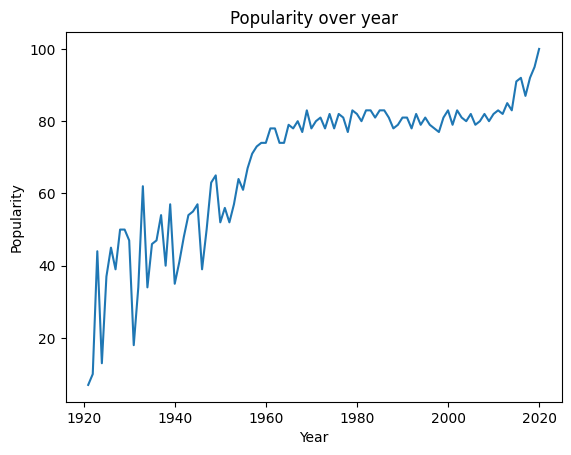

In [111]:
plt.title("Popularity over year")
plt.plot(new_df["year"], new_df["popularity"])
plt.xlabel("Year")
plt.ylabel("Popularity")
plt.show()

In [110]:
# correlation on popularity based dataframe
temp = new_df.drop(columns=["artists", "id", "name", "release_date"])
temp.corr(numeric_only=False)

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
acousticness,1.000000,-0.237745,-0.233463,-0.791627,-0.285772,0.354957,-0.244792,0.027236,-0.637858,0.060491,-0.668263,-0.068079,-0.115925,-0.241590,-0.719729
danceability,-0.237745,1.000000,-0.161146,0.237156,0.306325,-0.144177,0.092587,-0.152534,0.291972,-0.269924,0.143088,0.277322,-0.116767,0.440044,0.277667
duration_ms,-0.233463,-0.161146,1.000000,0.160213,0.067502,0.192317,-0.052597,0.010463,0.076465,0.092035,0.170118,-0.151659,0.031471,-0.213265,0.174922
energy,-0.791627,0.237156,0.160213,1.000000,0.237225,-0.134810,0.211517,-0.007048,0.765425,-0.157322,0.471048,0.143477,0.161010,0.385241,0.586424
explicit,-0.285772,0.306325,0.067502,0.237225,1.000000,-0.113294,0.043322,0.067461,0.312378,-0.043679,0.294083,0.232703,0.009464,-0.021262,0.415339
instrumentalness,0.354957,-0.144177,0.192317,-0.134810,-0.113294,1.000000,-0.112658,0.047883,-0.370925,-0.083650,-0.484413,0.184226,-0.111792,-0.263161,-0.395203
key,-0.244792,0.092587,-0.052597,0.211517,0.043322,-0.112658,1.000000,0.196474,0.157409,-0.148708,0.205558,-0.092562,0.062531,0.137381,0.257039
liveness,0.027236,-0.152534,0.010463,-0.007048,0.067461,0.047883,0.196474,1.000000,0.021476,-0.054034,-0.056309,-0.107116,0.026436,-0.071559,-0.072207
loudness,-0.637858,0.291972,0.076465,0.765425,0.312378,-0.370925,0.157409,0.021476,1.000000,-0.105312,0.443783,0.076441,0.228864,0.318453,0.581250
mode,0.060491,-0.269924,0.092035,-0.157322,-0.043679,-0.083650,-0.148708,-0.054034,-0.105312,1.000000,0.032674,-0.078648,0.004055,-0.114083,-0.071082


# Models

## Some importations

In [2]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.preprocessing import PolynomialFeatures

## Regression Models

### Linear Regression of loudness

On this part, we're going to build a regressor on the loudness given the energy

#### Training phase

In [13]:
model = LinearRegression()
energy = np.array(df_train["energy"]).reshape(-1, 1)
loudness = np.array(df_train["loudness"]).reshape(-1,1)
model.fit(energy, loudness)

LinearRegression()

Residuals = 1482664.490956728
The coefficient of determination is 0.6130485873460361


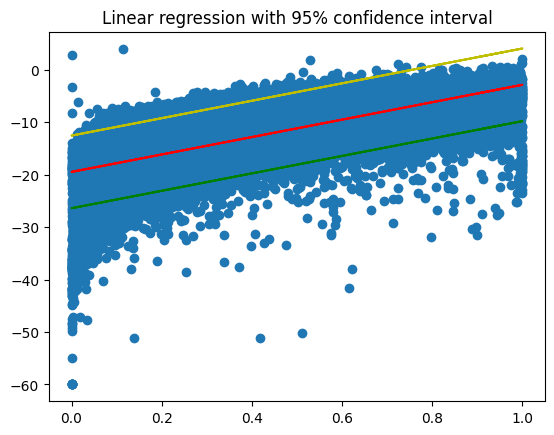

In [20]:
# Prediction on the training data
pred = model.predict(energy)

# Get the residuals
res = np.sum((pred-loudness)**2)
print(f"Residuals = {res}")

# Get the coefficient of determination
coef = model.score(energy, loudness)
print(f"The coefficient of determination is {coef}")

# Build a 95% confidence interval
std = np.sqrt((1/(len(loudness)-2))*res)
interval = (std * 1.96)
low, up = pred - interval, pred + interval

# Plot the data and the model
plt.title("Linear regression with 95% confidence interval")
plt.scatter(df_train["energy"], df_train["loudness"])
plt.plot(energy, low, c="g")
plt.plot(energy, pred, c="r")
plt.plot(energy, up, c="y")
plt.show()



In [21]:
print(model.coef_)

[[16.60516406]]


Observation :
We only have a score of 61,30% on training data. So, a simple linear regression of loudness with energy is not enough

#### Testing step

In [22]:
pred2 = model.predict(np.array(df_test["energy"]).reshape(-1,1))

score = model.score(np.array(df_test["energy"]).reshape(-1,1), np.array(df_test["loudness"]).reshape(-1,1))

print(f"Score = {score}")

Score = 0.6130859573184437


The score in testing data is a bit greater than the score in the training data. 

### Multiple linear regression of loudness with energy

#### Training phase

Score on training data : 0.6944451881403634


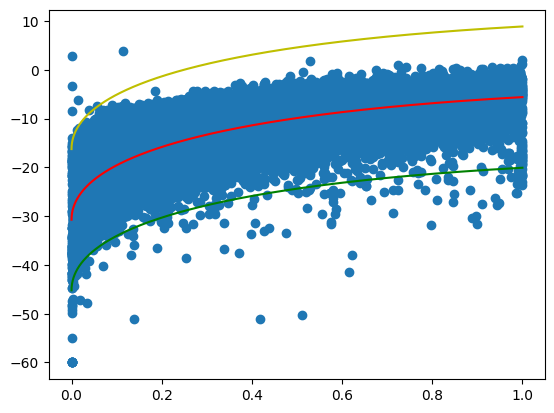

In [30]:
model_mult = LinearRegression()
energies = np.hstack((np.asarray(df_train["energy"]).reshape(-1,1), np.sqrt(np.asarray(df_train["energy"]).reshape(-1,1))))

# fit the model
model_mult.fit(energies, loudness)

# prediction training set
loudness_pred = model_mult.predict(energies)

# To get a nice plot
stack = np.hstack((energy, loudness, loudness_pred))
sorted_s = stack[np.argsort(stack[:, 0])]
energy2, loudness2, loudness_pred = np.hsplit(sorted_s, 3)

# score training data
score = model_mult.score(energies, loudness)
print(f"Score on training data : {score}")

# Compute a 95% confidence interval of the prediction
sum_errs = np.sum((loudness_pred - loudness)**2)
std = np.sqrt((1/(len(loudness)-2)) * sum_errs)
interval = 1.96 * std
low, up = loudness_pred - interval, loudness_pred + interval

# Plot 
plt.scatter(df_train["energy"], df_train["loudness"])
plt.plot(energy2, low, c="g")
plt.plot(energy2, loudness_pred, c="r")
plt.plot(energy2, up, c="y")
plt.show()

We get a better score and a better confidence interval

#### Testing

In [31]:
energies_test = np.hstack((np.asarray(df_test["energy"]).reshape(-1,1), np.sqrt(np.asarray(df_test["energy"]).reshape(-1,1))))

# prediction
loudness_predictions = model_mult.predict(energies_test)

# score
score1 = model_mult.score(energies_test, np.array(df_test["loudness"]).reshape(-1,1))

print(f"Score on test data = {score1}")

Score on test data = 0.6906821928115233


In [32]:
print(f"Difference of score between test data and training data : {score1 - score}")

Difference of score between test data and training data : -0.0037629953288400575


The score is a bit better on traing data

### Polynomial Ridge Regression on loudness given energy

#### Training step

Score = 0.6130485789009723
Ridge with degree = 1


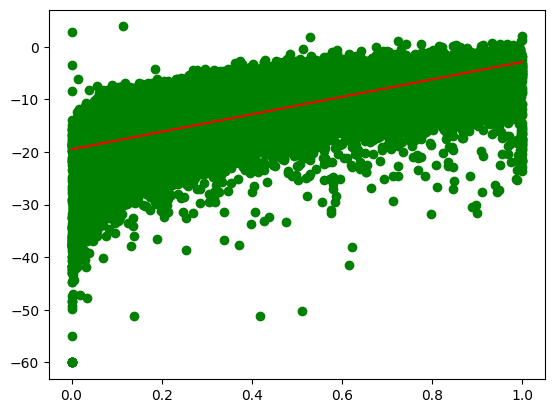

Score = 0.6684825016446907
Ridge with degree = 2


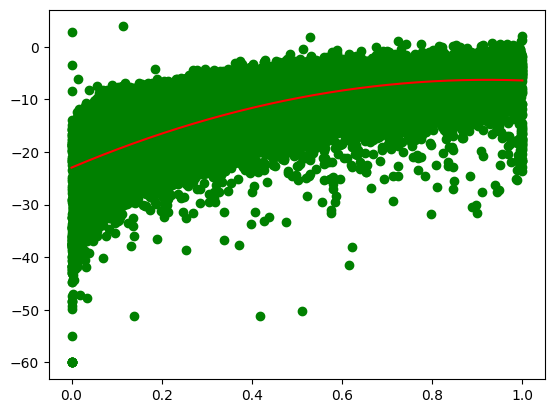

Score = 0.6856998841526967
Ridge with degree = 3


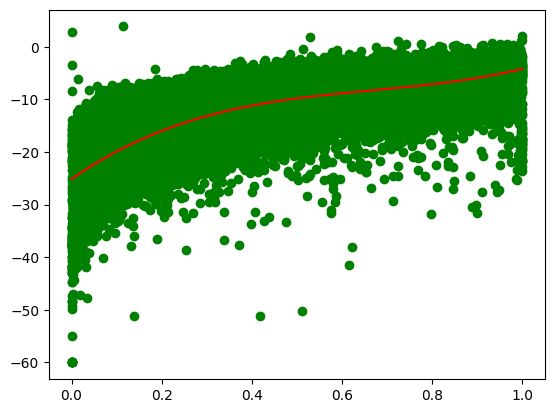

Score = 0.6873678751268928
Ridge with degree = 6


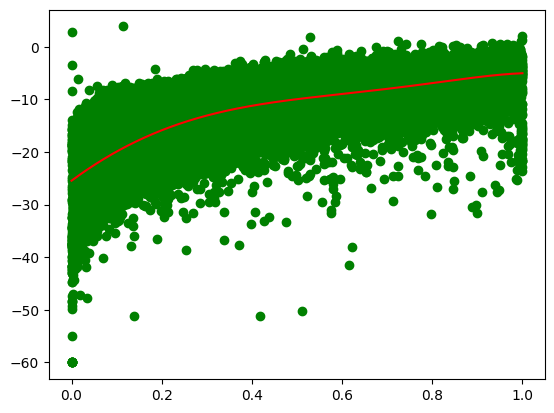

Score = 0.6873791344678727
Ridge with degree = 9


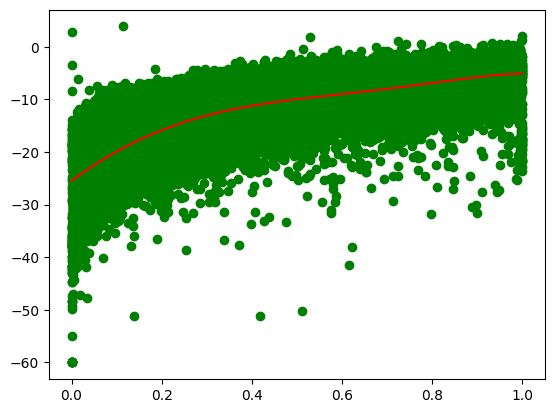

Score = 0.687692814540994
Ridge with degree = 12


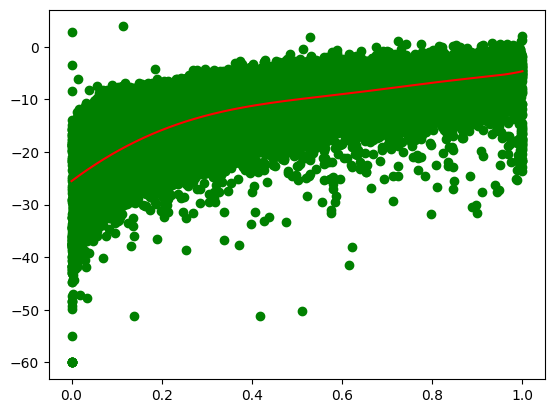

Score = 0.6876439153004057
Ridge with degree = 15


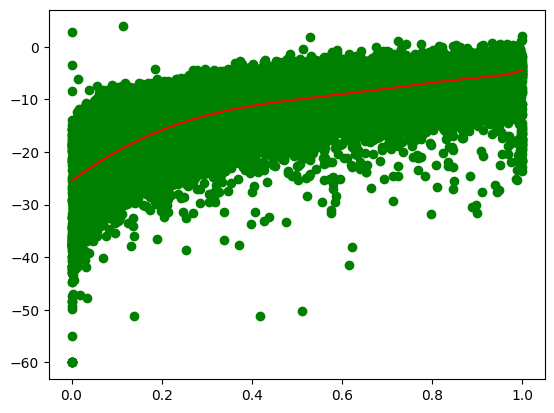

Score = 0.687725764215471
Ridge with degree = 18


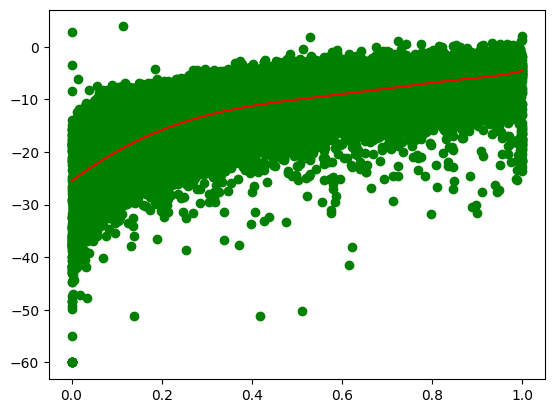

Score = 0.6878416686026382
Ridge with degree = 20


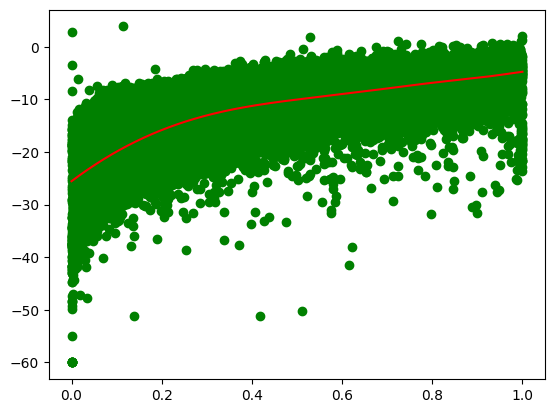

Score = 0.6881148611618053
Ridge with degree = 30


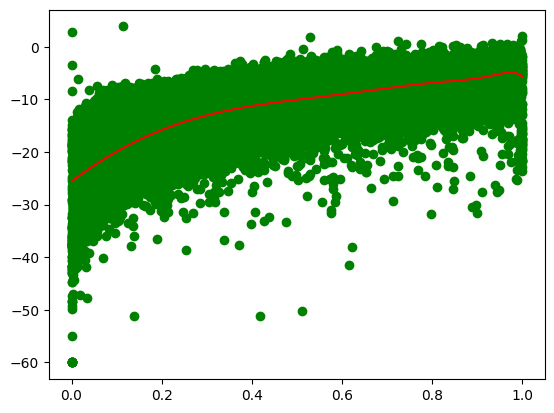

In [42]:
for deg in [1,2,3,6,9,12,15,18,20,30]:
    energy_deg = PolynomialFeatures(degree=deg).fit_transform(energy)[:,1:]
    model = Ridge()
    model.fit(energy_deg, loudness)
    
    # train the regressor on training set
    pred = model.predict(energy_deg)
    
    print(f"Score = {model.score(energy_deg, loudness)}")
    
    # For a nice plot
    stack = np.hstack((energy, pred))
    sorted_s = stack[np.argsort(stack[:,0])]
    energy2, pred = np.hsplit(sorted_s, 2)
    
    # plot
    print(f"Ridge with degree = {deg}")
    plt.scatter(df_train["energy"], df_train["loudness"], c="g")
    plt.plot(energy2, pred, c="r")
    plt.show()

The highest is the degree of the polynom, the better is the score. But we reach a limit of score on degree 12 where, whenever the increase of the degree, the score remains stable. The max score is 68%

#### Testing step

In [44]:
energy2 = np.array(df_test["energy"]).reshape(-1,1)
loudness2 = np.asarray(df_test["loudness"]).reshape(-1,1)
energy_deg = PolynomialFeatures(degree=30).fit_transform(energy2)[:,1:]
    
# train the regressor on training set
pred = model.predict(energy_deg)

print(f"Score on test data = {model.score(energy_deg, loudness2)}")

Score = 0.6857588178544347


### Lasso multiple linear regression

#### Training step

In [4]:
# training step
energy = np.array(df_train["energy"]).reshape(-1,1)
loudness = np.array(df_train["loudness"]).reshape(-1,1)
for deg in [1,2,3,6,9]:
    energy_deg = PolynomialFeatures(degree=deg).fit_transform(energy)[:,1:]
    model = Lasso()
    model.fit(energy_deg, loudness)
    
    # train the regressor on training set
    pred = model.predict(energy_deg)
    
    print(f"Score = {model.score(energy_deg, loudness)}")
    
    # plot
    print(f"Lasso with degree = {deg}")
    plt.scatter(df_train["energy"], df_train["loudness"], c="g")
    plt.plot(energy_deg, pred, c="r")
    plt.show()

NameError: name 'np' is not defined

# To do : 
- predict the year
- regression of loudness with energy + acousticness 
Goal of the regressions of loudness : which model help predict the best the loudness
Goal of the regressions of popularity : which parameters should the artists take into consideration to hope their music to be popular

Second step : get the most popular artists per year
- Take popular artists per year 
- analyze their data to see if from year to another, popularity criteria changed